STEP-1 - IMPORT THE NECESSARY LIBARIES 


In [1]:
## IMPORT THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

1.1 IMPORT THE DATASET

In [2]:
## IMPORT THE DATASET
data_train=pd.read_csv(r"D:\VISUVAL STUDIO WORKING FILES\CAPSTONE PROJECT BIA\DATASET\aug_train.csv")
data_test=pd.read_csv(r"D:\VISUVAL STUDIO WORKING FILES\CAPSTONE PROJECT BIA\DATASET\aug_test.csv")
print(data_train.head())
print(data_test.head())

   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM     

STEP-2 DATA PREPROCESSING AND EDA

2.1 CHECKING THE DATA INFO

In [3]:
data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

2.2 FIND THE NULL VALUES AND COUNT OF NULL VALUES

In [4]:
data_train.isnull().sum()
data_test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

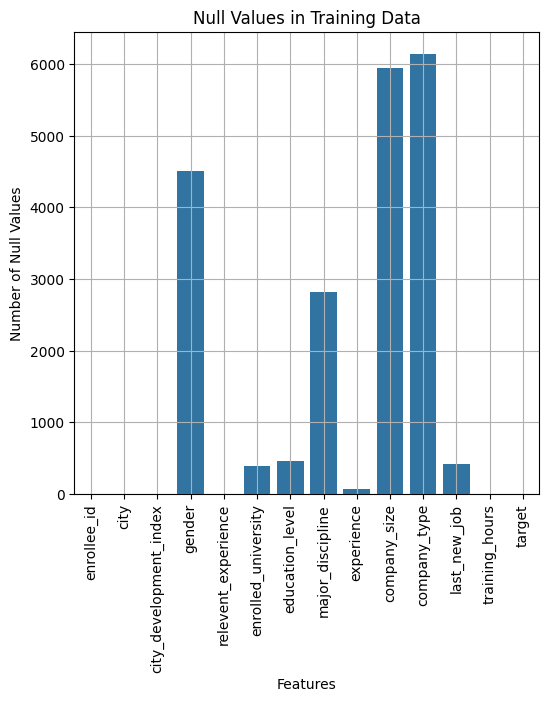

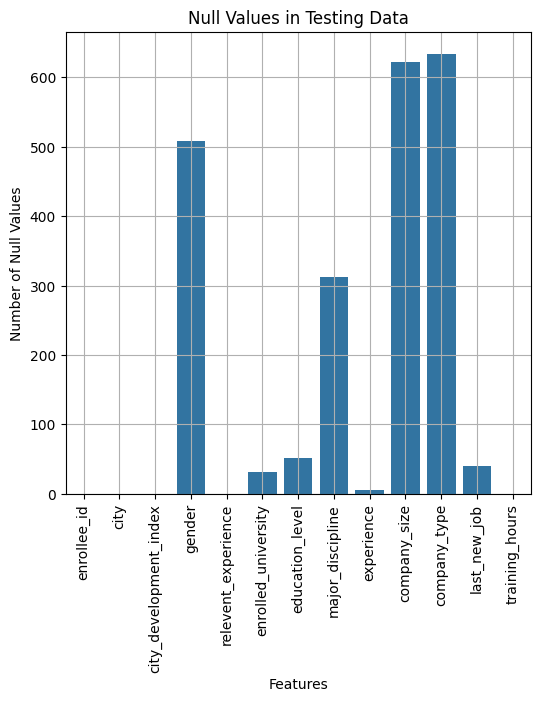

In [5]:
## VISUALIZATION OF NULL VALUES
plt.figure(figsize=(6,6))
sns.barplot(x=data_train.isnull().sum().index, y=data_train.isnull().sum().values)
plt.title("Null Values in Training Data")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Number of Null Values")
plt.grid()
plt.show()

plt.figure(figsize=(6,6))
sns.barplot(x=data_test.isnull().sum().index, y=data_test.isnull().sum().values)
plt.title("Null Values in Testing Data")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Number of Null Values")
plt.grid()
plt.show()

2.3 DESCRIBE ABOUT THE DATA STASTICALS MEAN 

In [6]:
data_train.describe(),data_test.describe()

(        enrollee_id  city_development_index  training_hours        target
 count  19158.000000            19158.000000    19158.000000  19158.000000
 mean   16875.358179                0.828848       65.366896      0.249348
 std     9616.292592                0.123362       60.058462      0.432647
 min        1.000000                0.448000        1.000000      0.000000
 25%     8554.250000                0.740000       23.000000      0.000000
 50%    16982.500000                0.903000       47.000000      0.000000
 75%    25169.750000                0.920000       88.000000      0.000000
 max    33380.000000                0.949000      336.000000      1.000000,
         enrollee_id  city_development_index  training_hours
 count   2129.000000             2129.000000     2129.000000
 mean   16861.614843                0.824984       64.983091
 std     9576.846029                0.125074       60.238660
 min        3.000000                0.448000        1.000000
 25%     8562.00000

2.4 FINDING THE DATASHAPE

In [7]:
data_train.shape,data_test.shape

((19158, 14), (2129, 13))

STEP-3 EDA ANALAYSIS

3.1 UNIVARIANTE (SINGLE VARIABLE ANALAYSIS)

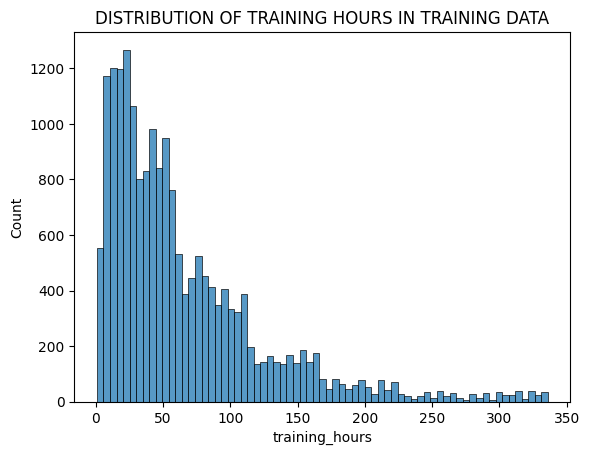

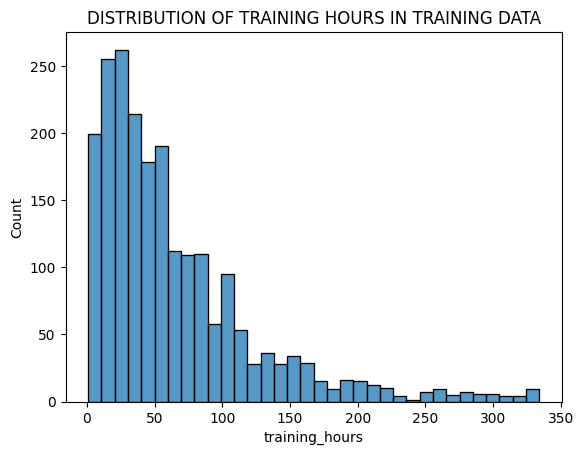

In [8]:
sns.histplot(data_train["training_hours"],fill=True,multiple="stack",hue_order=data_train["training_hours"].value_counts().index)
plt.title("DISTRIBUTION OF TRAINING HOURS IN TRAINING DATA")
plt.show()
sns.histplot(data_test["training_hours"],fill=True,multiple="stack",hue_order=data_test["training_hours"].value_counts().index)
plt.title("DISTRIBUTION OF TRAINING HOURS IN TRAINING DATA")
plt.show()
    

3.2 Univariate EDA for Categorical Features

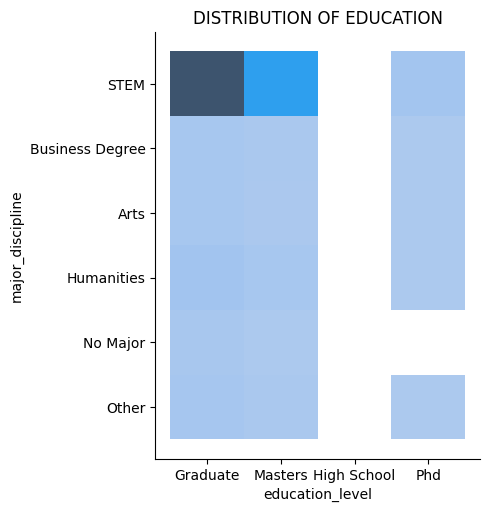

In [9]:
sns.displot(x=data_train["education_level"],y=data_train["major_discipline"])
plt.title("DISTRIBUTION OF EDUCATION")
plt.show()


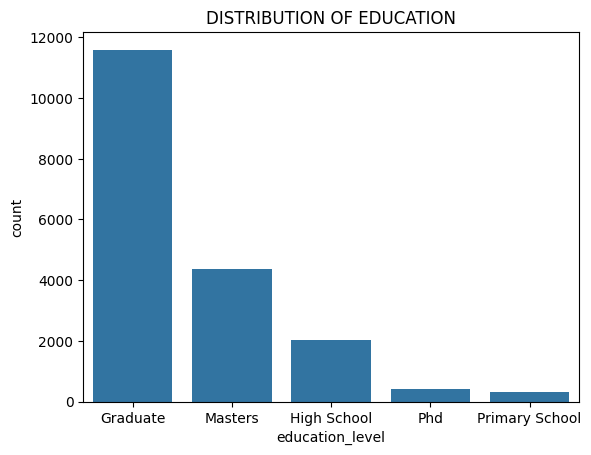

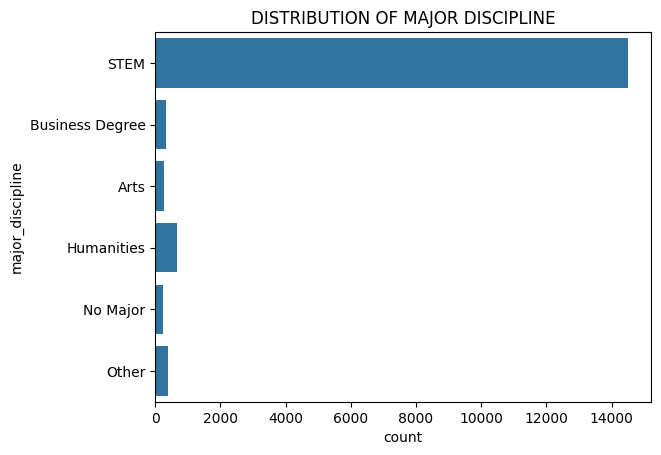

In [10]:
sns.countplot(x=data_train["education_level"])
plt.title("DISTRIBUTION OF EDUCATION")
plt.show()
sns.countplot(y=data_train["major_discipline"])
plt.title("DISTRIBUTION OF MAJOR DISCIPLINE")
plt.show()

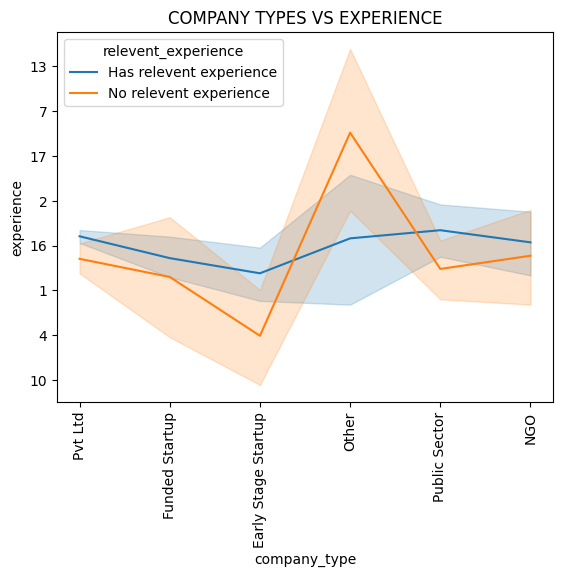

In [11]:
sns.lineplot(x=data_train['company_type'],y=data_train['experience'],hue=data_train['relevent_experience'],)
plt.xticks(rotation=90)
plt.title("COMPANY TYPES VS EXPERIENCE")
plt.show()

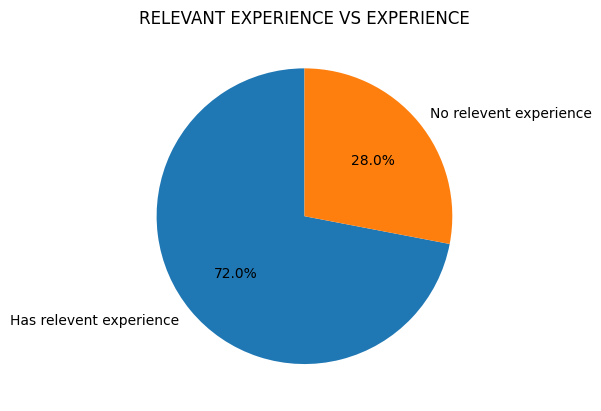

In [12]:


exp_counts = data_train["relevent_experience"].value_counts()
plt.pie(exp_counts, labels=exp_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("RELEVANT EXPERIENCE VS EXPERIENCE")
plt.show()

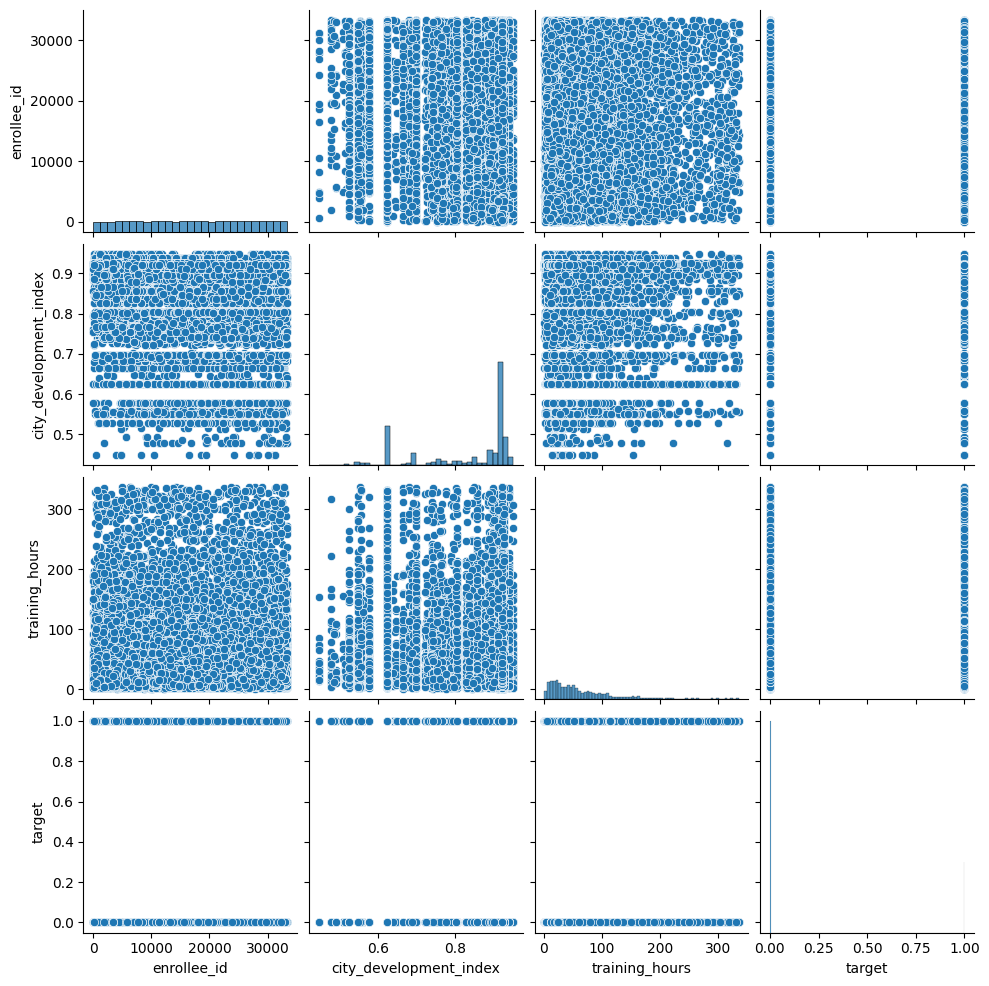

In [13]:
sns.pairplot(data_train)

2.5 CLEANING THE DATA

REMOVING UNWANTED FEATURES ARE UNRELATED TO DATA WHICH MAKE US TO CONFUSE,SO WE HAVE TO REMOVE IT

In [14]:
data_train.drop(['enrollee_id', 'city', 'city_development_index', 'gender', 'company_size', 'last_new_job'], axis=1, inplace=True)
data_test.drop(['enrollee_id', 'city', 'city_development_index', 'gender', 'company_size', 'last_new_job'], axis=1, inplace=True)

BEFORE REMOVING THE NULL WE HAVE ENCODE DATA BEACUSE THE ALL THE VALUES IN THE DATA SHOULBE IN INTGER .

STEP-3 FEATUREN ENGINEERING


3.1 ENCODE THE DATA WITH LABEL ENCODER and ONEHOTENCODER

In [15]:

from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to all object columns in train and test
New_data_train = data_train.copy()
New_data_test = data_test.copy()

for col in New_data_train.select_dtypes(include='object').columns:
	le = LabelEncoder()
	# Fit on combined data to handle unseen labels in test
	combined = pd.concat([New_data_train[col], New_data_test[col]], axis=0).astype(str)
	le.fit(combined)
	New_data_train[col] = le.transform(New_data_train[col].astype(str))
	New_data_test[col] = le.transform(New_data_test[col].astype(str))


In [16]:
New_data_train.shape

(19158, 8)

3.2 FINDING THE NULL AND REMOVE THE NULL 

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
New_data_train = pd.DataFrame(imputer.fit_transform(New_data_train), columns=New_data_train.columns)
New_data_test = pd.DataFrame(imputer.fit_transform(New_data_test), columns=New_data_test.columns)

In [18]:
New_data_train.describe(),New_data_test.describe()

(       relevent_experience  enrolled_university  education_level  \
 count         19158.000000         19158.000000      19158.00000   
 mean              0.280092             2.266468          0.80974   
 std               0.449056             1.223619          1.18836   
 min               0.000000             0.000000          0.00000   
 25%               0.000000             1.000000          0.00000   
 50%               0.000000             3.000000          0.00000   
 75%               1.000000             3.000000          2.00000   
 max               1.000000             3.000000          5.00000   
 
        major_discipline    experience  company_type  training_hours  \
 count      19158.000000  19158.000000  19158.000000    19158.000000   
 mean           4.864600     12.946028      4.810053       65.366896   
 std            1.054766      6.611732      1.492404       60.058462   
 min            0.000000      0.000000      0.000000        1.000000   
 25%            5

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(New_data_train.drop('target',axis=1))

,copy,True
,with_mean,True
,with_std,True


In [20]:
New_data_train

,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,training_hours,target
0,0.0,3.0,0.0,5.0,21.0,6.0,36.0,1.0
1,1.0,3.0,0.0,5.0,6.0,5.0,47.0,0.0
2,1.0,0.0,0.0,5.0,15.0,6.0,83.0,0.0
3,1.0,2.0,0.0,1.0,20.0,5.0,52.0,1.0
4,0.0,3.0,2.0,5.0,21.0,1.0,8.0,0.0
...,...,...,...,...,...,...,...,...
19153,1.0,3.0,0.0,2.0,5.0,6.0,42.0,1.0
19154,0.0,3.0,0.0,5.0,5.0,6.0,52.0,1.0
19155,0.0,3.0,0.0,5.0,21.0,5.0,44.0,0.0
19156,0.0,3.0,1.0,6.0,20.0,5.0,97.0,0.0


3.3 REMOVING OUTLIRES USING INTER QUARTILE RANGE

In [21]:
def find_outliers_iqr_all(data):
    outlier_indices = set()
    numeric_cols = data.select_dtypes(include=[np.number]).columns.drop('target')
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_indices.update(outliers.index)
    return data.loc[list(outlier_indices)]

outliers_total = find_outliers_iqr_all(New_data_train)
print(f"Total outliers found: {len(outliers_total)}")

Total outliers found: 7106


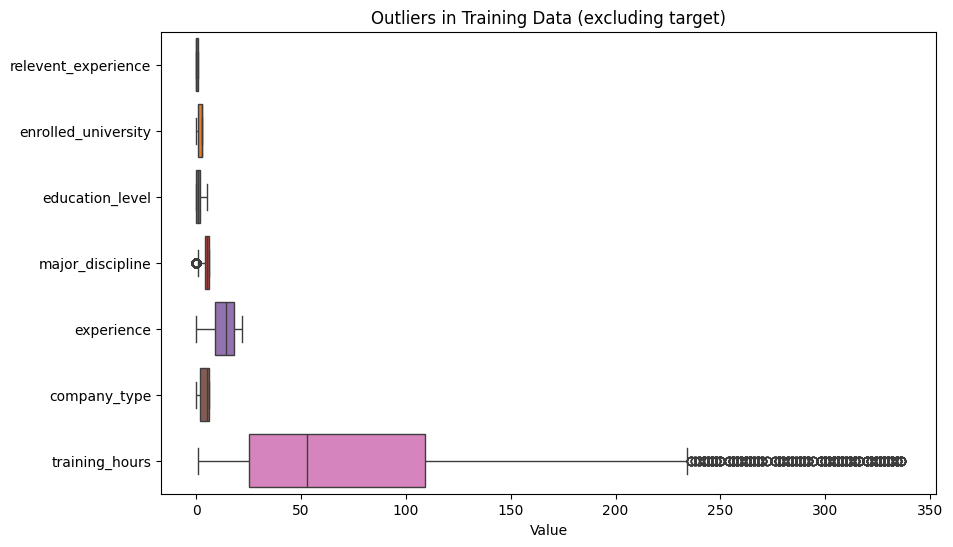

In [22]:
# Plot outliers in the training data
plt.figure(figsize=(10,6))
sns.boxplot(data=outliers_total.drop(columns=['target']), orient='h')
plt.title("Outliers in Training Data (excluding target)")
plt.xlabel("Value")
plt.show()



In [23]:
# Remove outliers found earlier and compare before/after
cleaned_train = New_data_train.drop(index=outliers_total.index).reset_index(drop=True)
# detect outliers in the test set and remove them (don't reuse train indices)
# ensure the function works when 'target' is not present in the test set
temp_test = New_data_test.copy()
if 'target' not in temp_test.columns:
    temp_test['target'] = np.nan  # add dummy numeric column so the function can drop it safely
outliers_test = find_outliers_iqr_all(temp_test)
cleaned_test = New_data_test.drop(index=outliers_test.index).reset_index(drop=True)

print(f"Outliers removed from train: {len(outliers_total)}")
print(f"Outliers removed from test:  {len(outliers_test)}")

print(f"Original shape: {New_data_train.shape}")
print(f"Cleaned shape:  {cleaned_train.shape}")

print(f"Original shape: {New_data_test.shape}")
print(f"Cleaned shape:  {cleaned_test.shape}")


Outliers removed from train: 7106
Outliers removed from test:  769
Original shape: (19158, 8)
Cleaned shape:  (12052, 8)
Original shape: (2129, 7)
Cleaned shape:  (1360, 7)


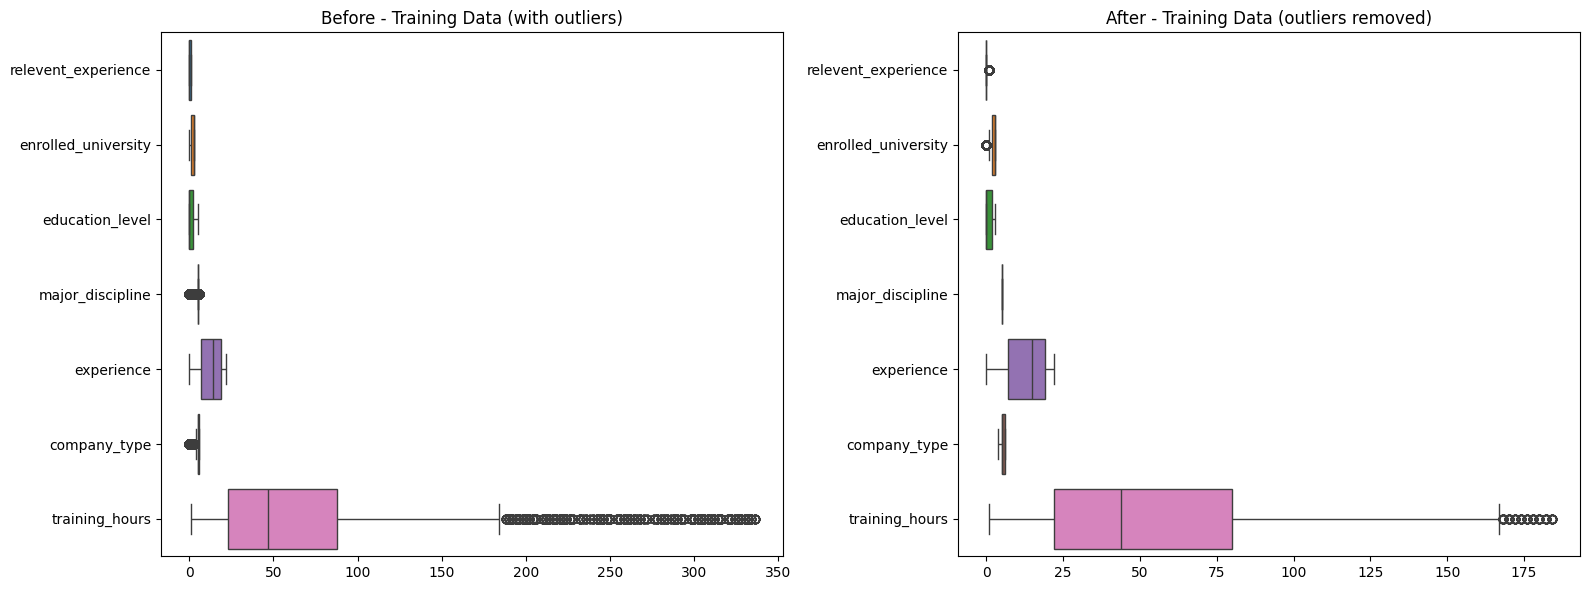

In [24]:


# Boxplots before vs after (exclude target)
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.boxplot(data=New_data_train.drop(columns=['target']), orient='h')
plt.title('Before - Training Data (with outliers)')

plt.subplot(1,2,2)
sns.boxplot(data=cleaned_train.drop(columns=['target']), orient='h')
plt.title('After - Training Data (outliers removed)')

plt.tight_layout()
plt.show()

In [25]:
## SPLITTING THE DATASET INTO INDEPENDENT AND DEPENDENT FEATURES
x=cleaned_train.drop('target',axis=1)
y=cleaned_train['target']

In [26]:
cleaned_train.shape

(12052, 8)

In [27]:
from sklearn.linear_model import RidgeCV
alphas=[0.1,1.0,10.0,100.0]
model=RidgeCV(alphas=alphas,cv=5)
model.fit(x,y)


,alphas,"[0.1, 1.0, ...]"
,fit_intercept,True
,scoring,None
,cv,5
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [28]:
model.alpha_

np.float64(10.0)

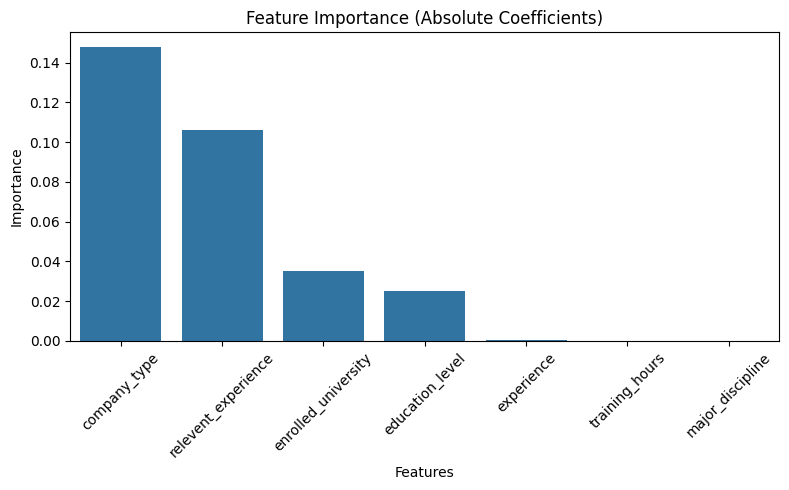

In [29]:
coef_df=pd.DataFrame({
    "features":x.columns,
    "coefficients":model.coef_,
    "importance":np.abs(model.coef_)
}).sort_values(by="importance",ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x='features', y='importance', data=coef_df)
plt.title('Feature Importance (Absolute Coefficients)')
plt.xticks(rotation=45)
plt.ylabel('Importance')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

STEP-4 BUILDING THE MODEL AND EVALAUTE USING LOGISTICREGRESSION

4.1 SPLITING THE DATA

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [32]:
model=LogisticRegression(max_iter=2000,class_weight='balanced',random_state=42)
model.fit(x_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [33]:
y_pred=model.predict(x_test)
print(f"ACCURACY SCORE:\n",accuracy_score(y_test,y_pred)),
print(f"classification_report:\n", classification_report(y_test, y_pred)),
print(f"confusion_matrix:\n", confusion_matrix(y_test,y_pred))

ACCURACY SCORE:
 0.6565740356698465
classification_report:
               precision    recall  f1-score   support

         0.0       0.81      0.69      0.74      1752
         1.0       0.41      0.57      0.47       659

    accuracy                           0.66      2411
   macro avg       0.61      0.63      0.61      2411
weighted avg       0.70      0.66      0.67      2411

confusion_matrix:
 [[1209  543]
 [ 285  374]]


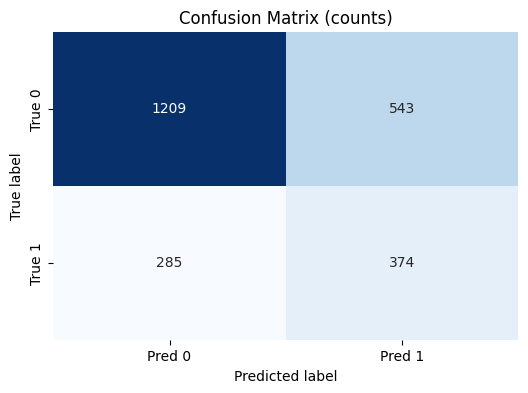

In [34]:
# plot confusion matrix (counts)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (counts)')
plt.show()

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve

In [36]:
lr_prob = model.predict_proba(x_test)[:, 1]

In [37]:
fpr, tpr,_= roc_curve(y_test, lr_prob)
auc_score = roc_auc_score(y_test, lr_prob)

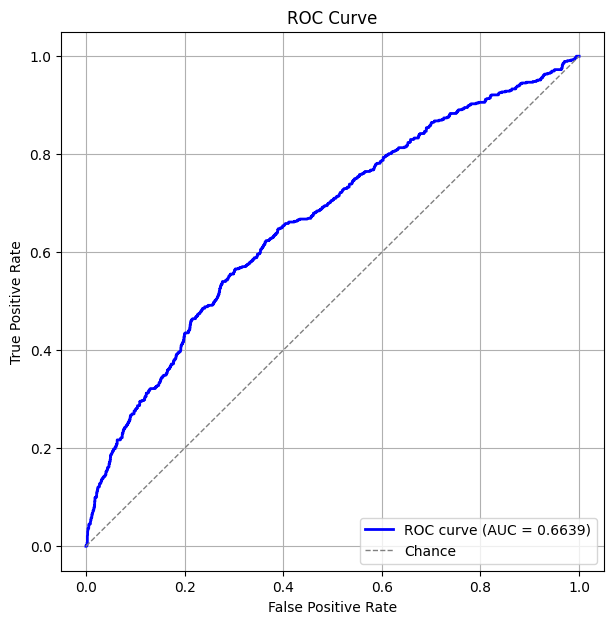

In [38]:
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

STEP-5 MODEL BUILDING AND EVALUVATION



In [39]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [40]:
model_rf = RandomForestClassifier(n_estimators=2000, random_state=52, class_weight='balanced',n_jobs=1)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
print(f"RANDOM FOREST ACCURACY SCORE:\n",accuracy_score(y_test,y_pred_rf)),
print("RANDOM FOREST classification_report:\n", classification_report(y_test, y_pred_rf)),
print(f"RANDOM FOREST confusion_matrix:\n", confusion_matrix(y_test,y_pred_rf))


RANDOM FOREST ACCURACY SCORE:
 0.6698465367067606
RANDOM FOREST classification_report:
               precision    recall  f1-score   support

         0.0       0.77      0.79      0.78      1752
         1.0       0.39      0.36      0.38       659

    accuracy                           0.67      2411
   macro avg       0.58      0.57      0.58      2411
weighted avg       0.66      0.67      0.67      2411

RANDOM FOREST confusion_matrix:
 [[1376  376]
 [ 420  239]]


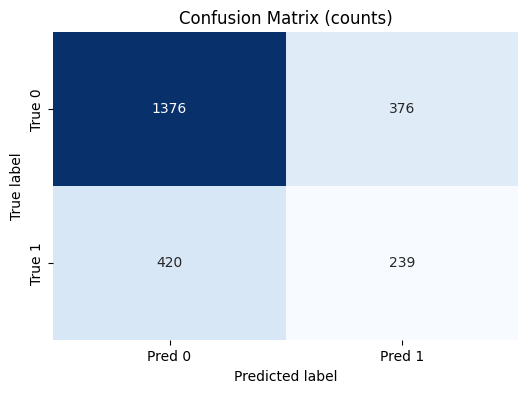

In [41]:
cm = confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (counts)')
plt.show()

In [42]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=42)
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
print(f"XGBOOST ACCURACY SCORE:\n", accuracy_score(y_test, y_pred_xgb))
print("XGBOOST classification_report:\n", classification_report(y_test, y_pred_xgb))
print(f"XGBOOST confusion_matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBOOST ACCURACY SCORE:
 0.7221070095396102
XGBOOST classification_report:
               precision    recall  f1-score   support

         0.0       0.77      0.89      0.82      1752
         1.0       0.49      0.27      0.35       659

    accuracy                           0.72      2411
   macro avg       0.63      0.58      0.59      2411
weighted avg       0.69      0.72      0.69      2411

XGBOOST confusion_matrix:
 [[1561  191]
 [ 479  180]]


In [43]:
from sklearn.calibration import CalibratedClassifierCV

In [44]:
# Train a calibrated classifier using the already-fitted logistic regression (`model`)
# use the held-out x_test/y_test as the calibration set (cv='prefit')
# note: newer scikit-learn uses the parameter name `estimator` instead of `base_estimator`
calibrated_clf = CalibratedClassifierCV(estimator=model, cv=10,method='sigmoid')
calibrated_clf.fit(x_test, y_test)

# Get calibrated probabilities and predictions
calib_prob = calibrated_clf.predict_proba(x_test)[:, 1]
calib_pred = calibrated_clf.predict(x_test)

# Evaluate calibrated model
calib_auc = roc_auc_score(y_test, calib_prob)
calib_acc = accuracy_score(y_test, calib_pred)

print(f"Original AUC: {auc_score:.6f}")
print(f"Calibrated AUC: {calib_auc:.6f}")
print(f"Calibrated Accuracy: {calib_acc:.6f}")

Original AUC: 0.663930
Calibrated AUC: 0.668115
Calibrated Accuracy: 0.740357


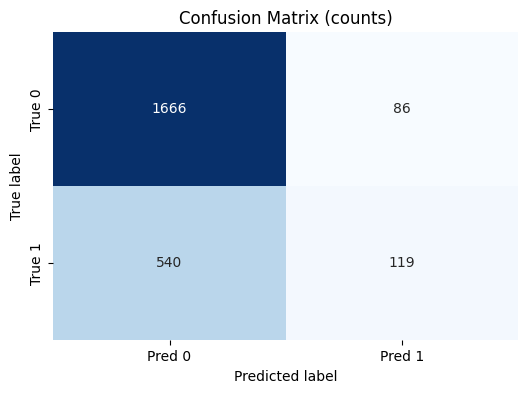

In [45]:
cm= confusion_matrix(y_test, calib_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (counts)')
plt.show()

In [46]:
# Compare performance of Logistic Regression and Random Forest on test set

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC: {auc_score:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
rf_auc = roc_auc_score(y_test, model_rf.predict_proba(x_test)[:, 1])
print(f"AUC: {rf_auc:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Results:
Accuracy: 0.6566
AUC: 0.6639
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.69      0.74      1752
         1.0       0.41      0.57      0.47       659

    accuracy                           0.66      2411
   macro avg       0.61      0.63      0.61      2411
weighted avg       0.70      0.66      0.67      2411


Random Forest Results:
Accuracy: 0.6698
AUC: 0.6397
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.79      0.78      1752
         1.0       0.39      0.36      0.38       659

    accuracy                           0.67      2411
   macro avg       0.58      0.57      0.58      2411
weighted avg       0.66      0.67      0.67      2411



In [47]:
print("\nCalibrated Logistic Regression Results:")
print(f"Accuracy: {calib_acc:.4f}")
print(f"AUC: {calib_auc:.4f}")
print("Classification Report:\n", classification_report(y_test, calib_pred))


Calibrated Logistic Regression Results:
Accuracy: 0.7404
AUC: 0.6681
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.95      0.84      1752
         1.0       0.58      0.18      0.28       659

    accuracy                           0.74      2411
   macro avg       0.67      0.57      0.56      2411
weighted avg       0.71      0.74      0.69      2411



In [48]:
data_train.to_csv("predicted_train.csv", index=False)
